In [1]:
# Formação Cientista de Dados
# Previsão de Séries Temporais (ARIMA)
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
## pip install pmdarima
from pmdarima.arima import auto_arima

In [3]:
#conversão dos atributos que estão no formato string para o formato ano-mês
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [4]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


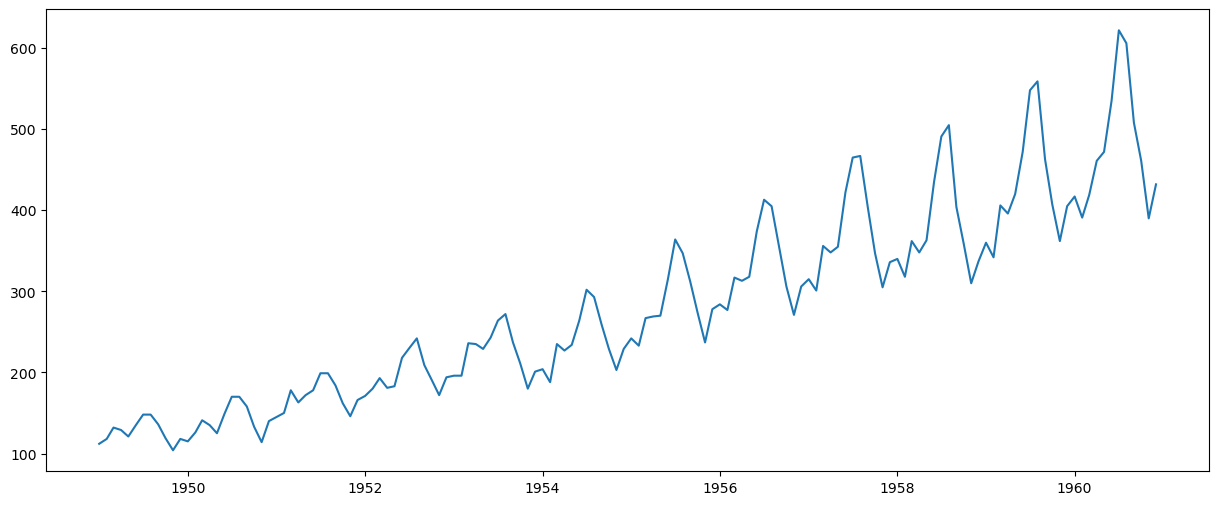

In [5]:
plt.plot(data)

In [8]:
stepwise_model = auto_arima(data, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.12 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.43 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.25 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.64 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=2.01 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.18 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.43 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=1.32 sec
 ARIM

In [9]:
#1019.1780567487502
print(stepwise_model.aic())

1012.9907964801133


In [10]:
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [11]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [12]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [13]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [14]:
future_forecast = stepwise_model.predict(n_periods=12)

In [15]:
future_forecast

1960-01-01    420.237442
1960-02-01    398.454297
1960-03-01    461.907973
1960-04-01    450.687907
1960-05-01    474.007668
1960-06-01    537.917144
1960-07-01    612.241586
1960-08-01    623.600395
1960-09-01    520.170472
1960-10-01    462.320606
1960-11-01    412.933257
1960-12-01    453.755318
Freq: MS, dtype: float64

In [17]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

<Axes: xlabel='Month'>

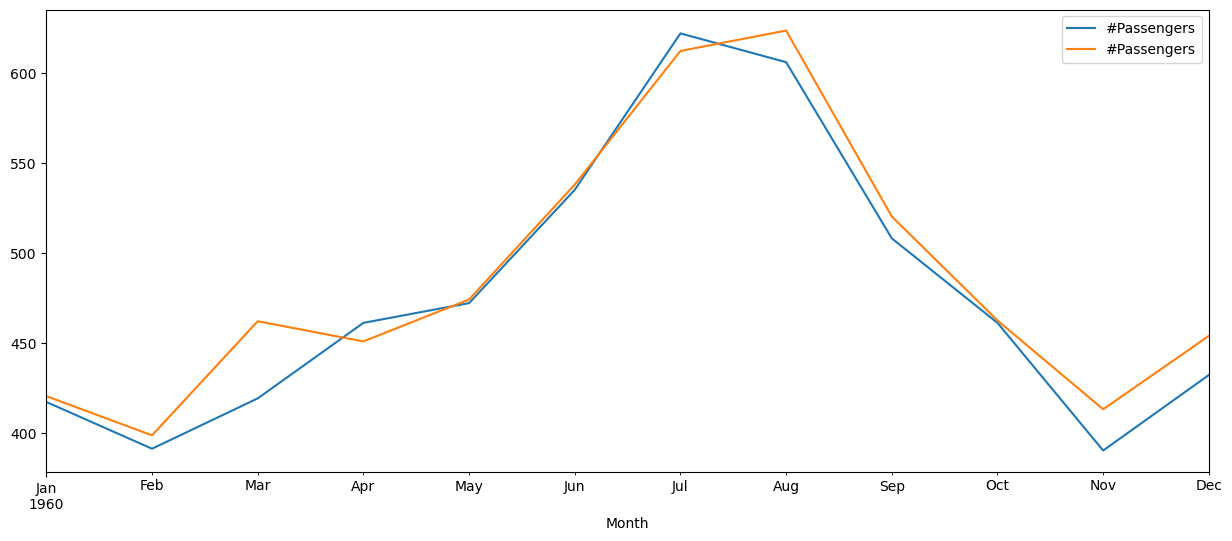

In [18]:
#azul test laranja forecast
pd.concat([test,future_forecast],axis=1).plot()

<Axes: xlabel='Month'>

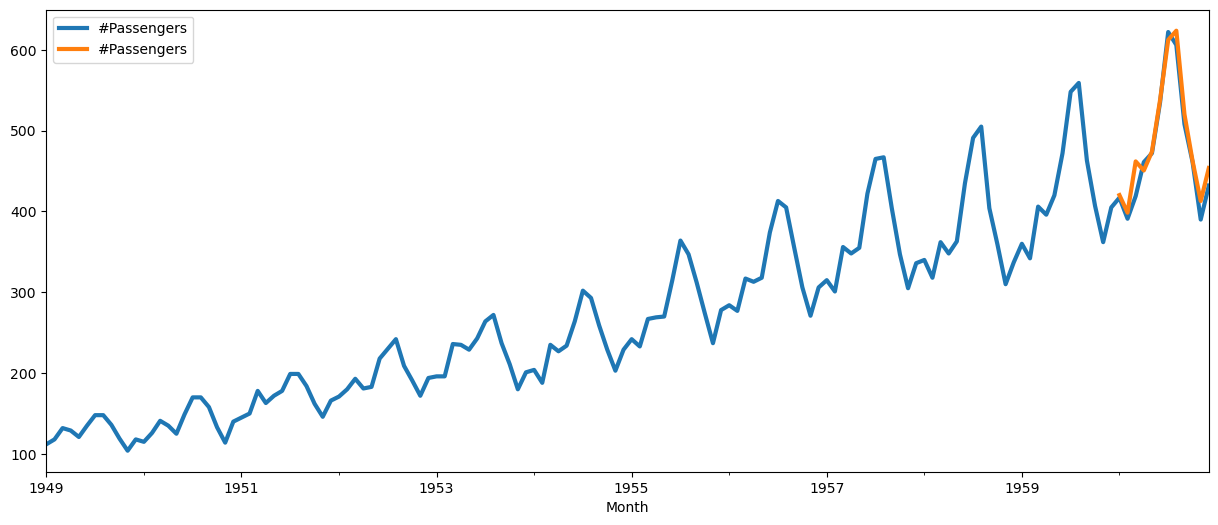

In [19]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)